# Image classification using keras
This notebook describes how to train an image classification network using keras on a Dataset. We're using Dogs and Cats dataset

In [1]:
#importing modules
import glob
import os
import tensorflow
import tensorflow.keras as keras
from keras.layers import Conv2D, MaxPool2D, ReLU, Dense, Flatten, Input
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.preprocessing.image import img_to_array,load_img
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions

In [8]:
#migrating inside the dogs and cats dataset saved in google drive folder
cd /content/drive/MyDrive/Colab Notebooks/Dogs_cats_dataset

/content/drive/MyDrive/Colab Notebooks/Dogs_cats_dataset


In [9]:
#unzipping the Dogs and cats dataset
#!unzip Dogs_cats.zip

In [12]:
# showing the directory structre
! ls 

Dogs_cats.zip  test  train


In [13]:
#counting the number of samples
Train_path ="train/train/"
Test_path = "test/test/"
print("Number of images for training::" +str(len(os.listdir(os.path.dirname(Train_path)))))
print("Number of images for testing::"+ str(len(os.listdir(os.path.dirname(Test_path)))))

Number of images for training::25001
Number of images for testing::12500


In [ ]:
#checking the directory contents of Train dataset
for file in glob.glob(Train_path+"*"):
  print(file)

Streaming output truncated to the last 5000 lines.
train/train/dog.5499.jpg
train/train/dog.55.jpg
train/train/dog.550.jpg
train/train/dog.5500.jpg
train/train/dog.5501.jpg
train/train/dog.5502.jpg
train/train/dog.5503.jpg
train/train/dog.5504.jpg
train/train/dog.5505.jpg
train/train/dog.5506.jpg
train/train/dog.5507.jpg
train/train/dog.5508.jpg
train/train/dog.5509.jpg
train/train/dog.551.jpg
train/train/dog.5510.jpg
train/train/dog.5511.jpg
train/train/dog.5512.jpg
train/train/dog.5513.jpg
train/train/dog.5514.jpg
train/train/dog.5515.jpg
train/train/dog.5516.jpg
train/train/dog.5517.jpg
train/train/dog.5518.jpg
train/train/dog.5519.jpg
train/train/dog.552.jpg
train/train/dog.5520.jpg
train/train/dog.5521.jpg
train/train/dog.5522.jpg
train/train/dog.5523.jpg
train/train/dog.5524.jpg
train/train/dog.5525.jpg
train/train/dog.5526.jpg
train/train/dog.5527.jpg
train/train/dog.5528.jpg
train/train/dog.5529.jpg
train/train/dog.553.jpg
train/train/dog.5530.jpg
train/train/dog.5531.jpg
train

In [ ]:
#checking the directory contents of Val dataset
for file in glob.glob(Test_path+"*"):
  print(file)

Streaming output truncated to the last 5000 lines.
test/test/5499.jpg
test/test/55.jpg
test/test/550.jpg
test/test/5500.jpg
test/test/5501.jpg
test/test/5502.jpg
test/test/5503.jpg
test/test/5504.jpg
test/test/5505.jpg
test/test/5506.jpg
test/test/5507.jpg
test/test/5508.jpg
test/test/5509.jpg
test/test/551.jpg
test/test/5510.jpg
test/test/5511.jpg
test/test/5512.jpg
test/test/5513.jpg
test/test/5514.jpg
test/test/5515.jpg
test/test/5516.jpg
test/test/5517.jpg
test/test/5518.jpg
test/test/5519.jpg
test/test/552.jpg
test/test/5520.jpg
test/test/5521.jpg
test/test/5522.jpg
test/test/5523.jpg
test/test/5524.jpg
test/test/5525.jpg
test/test/5526.jpg
test/test/5527.jpg
test/test/5528.jpg
test/test/5529.jpg
test/test/553.jpg
test/test/5530.jpg
test/test/5531.jpg
test/test/5532.jpg
test/test/5533.jpg
test/test/5534.jpg
test/test/5535.jpg
test/test/5536.jpg
test/test/5537.jpg
test/test/5538.jpg
test/test/5539.jpg
test/test/554.jpg
test/test/5540.jpg
test/test/5541.jpg
test/test/5542.jpg
test/t

In [14]:
#Going inside the train directory
os.chdir(Train_path)

In [15]:
#create feature and label vectors for training
image_features = []
label_vectors = []
cat_image_count, dog_image_count= 0,0
#due to colab's RAM limitations setting number of images to 1000 images per class
image_per_class =0
#going inside the training directory

#iterating through the training dataset and appending them in image_features and label_vectors
for file in glob.glob("*"):
  if file.startswith('dog') and dog_image_count< 1001:
    class_label=0
    label_vectors.append(class_label)
    dog_image_count +=1
    print("Dog's image count", dog_image_count)
    image = load_img(file,target_size=(96, 96))
    feature_vector= img_to_array(image)
    image_features.append(feature_vector)
  elif file.startswith('cat') and cat_image_count <1001:
    class_label=1
    label_vectors.append(class_label)
    cat_image_count+=1
    print("Cat's image count", cat_image_count)
    image = load_img(file,target_size=(96, 96))
    feature_vector= img_to_array(image)
    image_features.append(feature_vector)
  #creating feature vector by loading image

#printing the final length of features and labels array
print(len(image_features))
print(len(label_vectors))


Dog's image count 1
Dog's image count 2
Dog's image count 3
Dog's image count 4
Dog's image count 5
Dog's image count 6
Dog's image count 7
Dog's image count 8
Dog's image count 9
Dog's image count 10
Dog's image count 11
Dog's image count 12
Dog's image count 13
Dog's image count 14
Dog's image count 15
Dog's image count 16
Dog's image count 17
Dog's image count 18
Dog's image count 19
Dog's image count 20
Dog's image count 21
Dog's image count 22
Dog's image count 23
Dog's image count 24
Dog's image count 25
Dog's image count 26
Dog's image count 27
Dog's image count 28
Dog's image count 29
Dog's image count 30
Dog's image count 31
Dog's image count 32
Dog's image count 33
Dog's image count 34
Dog's image count 35
Dog's image count 36
Dog's image count 37
Dog's image count 38
Dog's image count 39
Dog's image count 40
Dog's image count 41
Dog's image count 42
Dog's image count 43
Dog's image count 44
Dog's image count 45
Dog's image count 46
Dog's image count 47
Dog's image count 48
D

In [16]:
#making train and test split
X_train, X_val, y_train, y_val = train_test_split(image_features, label_vectors, test_size=0.33)

In [17]:

#converting each of the feature and label vector lists to numpy array
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)
#checking number of cats and dogs samples in each of training and val dataset
# 0 is dog 1 is cat
print("Number of dogs in training samples",np.shape(np.where(y_train==0))[1])
print("Number of cats in training samples",np.shape(np.where(y_train==1))[1])
print("Number of dogs in val samples",np.shape(np.where(y_val==0))[1])
print("Number of cats in val samples",np.shape(np.where(y_val==1))[1])


Number of dogs in training samples 662
Number of cats in training samples 679
Number of dogs in val samples 339
Number of cats in val samples 322


Great ! We have almost uniform number of samples/class. Now let's dive into training the model by transfer learning

In [18]:
#printing the shapes of training and val set
print("Shape of training features and labels are ::", np.shape(X_train), np.shape(y_train)) 
print("Shape of validation features and labels are ::",np.shape(X_val), np.shape(y_val))

Shape of training features and labels are :: (1341, 96, 96, 3) (1341,)
Shape of validation features and labels are :: (661, 96, 96, 3) (661,)


In [19]:
#converting the labels to categorical labels
y_train = to_categorical(y_train, dtype ="uint8") 
y_val = to_categorical(y_val, dtype ="uint8") 


# Training procedure via Transfer learning.
We will take EfficientNetB7 from keras applications

In [20]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [21]:
#Defining input shape
inputshape = [96,96]
#creating an instance of Classification model via EfficientNetB7 Class
#include_top = False is to denote that we don't want to use the first and last layers
ClassificationModel = EfficientNetB7(input_shape=inputshape+[3],include_top=False, weights='imagenet')

258080768/258076736 [==============================] - 1s 0us/step


In [22]:
# now setting the rest of the layers as trainable=False
for model_layer in ClassificationModel.layers:
  model_layer.trainable = False

In [23]:
#number of classes is 2 i.e Dog and cats
num_classes = 2
output_layer = Flatten()(ClassificationModel.output)
#now passing this output_layer with dense with "Sigmoid(since class=2)", use softmax if class>2
final_output = Dense(2, activation='sigmoid')(output_layer)

#now bundling input and output finally to create our model
classification_model = Model(inputs= ClassificationModel.input, outputs= final_output)

In [24]:
#printing summary of model
classification_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 96, 96, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 96, 96, 3)    7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 97, 97, 3)    0           normalization[0][0]              
______________________________________________________________________________________________

In [25]:
#compiling the model with loss function and optimizer
classification_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
#now training the model
tensorflow.config.experimental_run_functions_eagerly(True)
session_history= classification_model.fit(X_train,y_train, batch_size=16, epochs=10,validation_data=(X_val,y_val),validation_batch_size=16, workers=12, use_multiprocessing=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/10
84/84 [==============================] - 52s 620ms/step - loss: 0.2024 - accuracy: 0.9083 - val_loss: 0.2447 - val_accuracy: 0.8880
Epoch 2/10
84/84 [==============================] - 51s 611ms/step - loss: 0.1638 - accuracy: 0.9336 - val_loss: 0.2200 - val_accuracy: 0.9017
Epoch 3/10
84/84 [==============================] - 52s 613ms/step - loss: 0.1074 - accuracy: 0.9582 - val_loss: 0.2425 - val_accuracy: 0.8926
Epoch 4/10
84/84 [==============================] - 51s 605ms/step - loss: 0.1069 - accuracy: 0.9597 - val_loss: 0.2518 - val_accuracy: 0.8956
Epoch 5/10
84/84 [==============================] - 51s 610ms/step - loss: 0.0725 - accuracy: 0.9746 - val_loss: 0.2298 - val_accuracy: 0.9092
Epoch 6/10
84/84 [==============================] - 52s 616ms/step - loss: 0.0718 - accuracy: 0.9754 - val_loss: 0.2613 - val_accuracy: 0.8986
Epoch 7/10
84/84 [==============================] - 51s 608ms/step - loss: 0.0582 - accuracy: 0.9806 - val_loss: 0.2541 - val_accuracy: 0.8956

In [28]:
#saving model
classification_model.save('TrainedModel.h5')

In [29]:
#checking google drive if the model is saved or not ?
!ls

cat.0.jpg      cat.3251.jpg  cat.7753.jpg   dog.12253.jpg  dog.5504.jpg
cat.10000.jpg  cat.3252.jpg  cat.7754.jpg   dog.12254.jpg  dog.5505.jpg
cat.10001.jpg  cat.3253.jpg  cat.7755.jpg   dog.12255.jpg  dog.5506.jpg
cat.10002.jpg  cat.3254.jpg  cat.7756.jpg   dog.12256.jpg  dog.5507.jpg
cat.10003.jpg  cat.3255.jpg  cat.7757.jpg   dog.12257.jpg  dog.5508.jpg
cat.10004.jpg  cat.3256.jpg  cat.7758.jpg   dog.12258.jpg  dog.5509.jpg
cat.10005.jpg  cat.3257.jpg  cat.7759.jpg   dog.12259.jpg  dog.550.jpg
cat.10006.jpg  cat.3258.jpg  cat.775.jpg    dog.1225.jpg   dog.5510.jpg
cat.10007.jpg  cat.3259.jpg  cat.7760.jpg   dog.12260.jpg  dog.5511.jpg
cat.10008.jpg  cat.325.jpg   cat.7761.jpg   dog.12261.jpg  dog.5512.jpg
cat.10009.jpg  cat.3260.jpg  cat.7762.jpg   dog.12262.jpg  dog.5513.jpg
cat.1000.jpg   cat.3261.jpg  cat.7763.jpg   dog.12263.jpg  dog.5514.jpg
cat.10010.jpg  cat.3262.jpg  cat.7764.jpg   dog.12264.jpg  dog.5515.jpg
cat.10011.jpg  cat.3263.jpg  cat.7765.jpg   dog.12265.jpg  dog.55

In [30]:
#loading model
classification_model = keras.models.load_model('TrainedModel.h5')

# Plotting the metrics

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


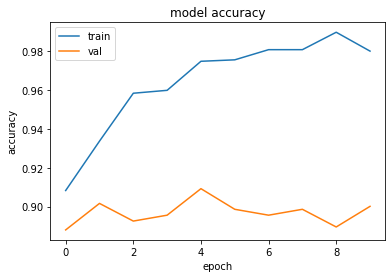

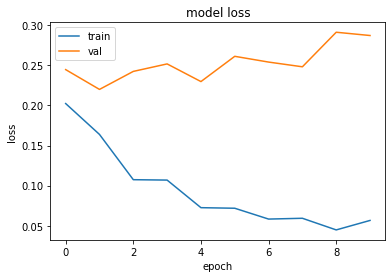

In [32]:
#plotting the metrics
import matplotlib.pyplot as plt
# find keys
print(session_history.history.keys())
# summarize history for accuracy
plt.plot(session_history.history['accuracy'])
plt.plot(session_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(session_history.history['loss'])
plt.plot(session_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model inference stage


In [38]:
#Test image visualisation function
def visualize(img):
  plt.imshow(img)
  plt.show()

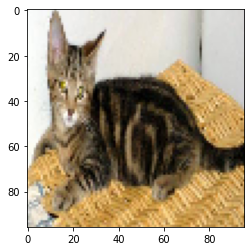

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Cat


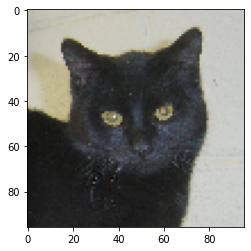

Cat


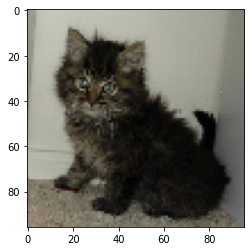

Cat


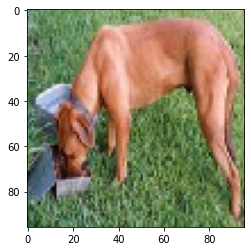

Dog


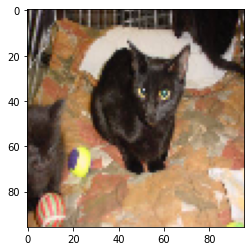

Cat


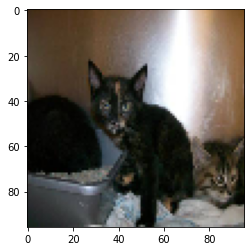

Cat


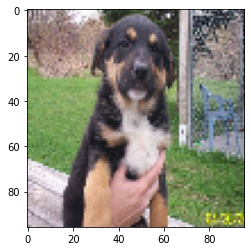

Dog


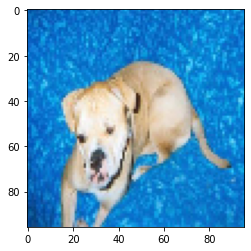

Dog


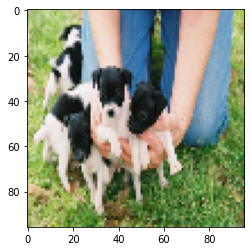

Dog


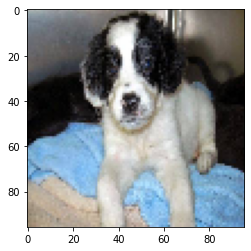

Dog


In [63]:
#Taking few image at random from test set
#generating 10 random indices
import random
test_idx = []
for i in range(10):
  test_idx.append(round(random.random()*1000))
#Now inferencing over each index in test_idx
for idx in test_idx:
  test_image_path = "../../test/test/"+str(idx)+".jpg"
  img = image.load_img(test_image_path, target_size=(96, 96))
  visualize(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = classification_model.predict(x)
#print(float(preds[0][1]))
  if float(preds[0][1]) > float(preds[0][0]):
    print("Cat")
  elif float(preds[0][1]) < float(preds[0][0]):
    print("Dog")
#print('Predicted:', decode_predictions(preds)[0])